### 1) Libraries Import

In [389]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)

### 2) Loading and checking of data

In [391]:
#Reading
data = pd.read_csv('application_data.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [392]:
#Shape of data
data.shape

(307511, 122)

In [393]:
#describing the data
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [394]:
#Columns datatype
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

### 3) Missing Values

*Since the data is huge, we need to get rid of the columns that have a lot of null values

In [395]:
data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

*Since we need to decide on which columns to drop, we are going to find the % null values

In [396]:
null_count=round(100*(data.isnull().sum()/len(data.index)),2)
null_count

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

*Columns with more than 40% of null values are:

In [397]:
null_count=null_count[null_count>=40]
null_count

OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

*So the number of columns having more than 40% null values

In [398]:
len(null_count)

49

Hence, we have to remove 49 columns from our dataset.

### 4) Dropping columns from the dataset

In [399]:
col_dropped = (null_count[null_count>=40].index)
col_dropped = list(col_dropped)
data.drop(labels=col_dropped,axis=1,inplace=True)

Checking the shape of the modified dataframe

In [400]:
data.shape

(307511, 73)

Columns after dropping missing value columns

In [401]:
100*(data.isnull().sum()/len(data.index))

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

Now, we see here that some important columns with less than 1% of null (and numeric) values are AMT_ANNUITY, AMT_GOODS_PRICE, EXT_SOURCE_2, NAME_TYPE_SUITE, so the missing values in these columns will have to be treated.
In order to decide which one of mean/median is to be used, we need to check if there are outliers in each respective column.

###### For AMT_ANNUITY

In [402]:
# Total missing values in the column
data.AMT_ANNUITY.isnull().sum()

12

In [403]:
# Percentage of missing values
float(100*(12/307511))

0.003902299429939092

In [404]:
# Describing the column
data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

This column is a numeric one and has an outlier, we will impute the values with median.

###### For AMT_GOODS_PRICE

In [405]:
# Total missing values in the column
data.AMT_GOODS_PRICE.isnull().sum()

278

In [406]:
# Percentage of missing values
float(100*(278/307511))

0.09040327012692229

In [407]:
# Describing the column
data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

This variable is a numeric one and has an outlier, we will impute the values with median.

###### For EXT_SOURCE_2

In [408]:
# Total missing values in the column
data.EXT_SOURCE_2.isnull().sum()

660

In [409]:
# Percentage of missing values
float(100*(660/307511))

0.21462646864665005

This variable is a numeric one, hence we will impute the values with 0.

###### For NAME_TYPE_SUITE

In [410]:
# Total missing values in the column
data.NAME_TYPE_SUITE.isnull().sum()

1292

In [411]:
# Percentage of missing values
float(100*(1292/307511))

0.42014757195677555

In [412]:
# Finding out the percentage of each entry in the column
data.NAME_TYPE_SUITE.value_counts(normalize= True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [414]:
# The mode of NAME_TYPE_SUITE in the dataset (most repeated entry)
nametype_mode=data.NAME_TYPE_SUITE.mode()[0]
nametype_mode

'Unaccompanied'

This variable is a categorical one, hence we can impute the values with the most repeated entry i.e. 'Unaccompanied'.

###### For OCCUPATION_TYPE

In [415]:
# Total missing values in the column
data.OCCUPATION_TYPE.isnull().sum()

96391

In [416]:
# Percentage of missing values
float(100*(96391/307511))

31.345545362604916

In [417]:
# Finding out the percentage of each entry in the column
data.OCCUPATION_TYPE.value_counts(normalize= True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [419]:
# The mode of OCCUPATION_TYPE in the dataset (most repeated entry)
occupation_mode=data.OCCUPATION_TYPE.mode()[0]
occupation_mode

'Laborers'

This variable is a also categorical one, hence we can impute the values with the most repeated entry i.e. 'Labourers'.

### 5) Checking Datatypes

In [420]:
# Dataset preview
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [421]:
# We are going to check the number of unique values in columns
# If the number of unique values <=40 - it is a Categorical column
# If the number of unique values in a columns> 50 - it is a Continuous column

data.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY              2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_10                    2
FLAG_EMP_PHONE                      2
FLAG_MOBIL                          2
FLAG_DOCUMEN

Now, we have to change the datatypes of certain categorical and continuous variables

###### 5.1) DAYS_BIRTH variable

In [422]:
#df['DAYS_BIRTH']=abs(df['DAYS_BIRTH'])
data['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Here, we can see that there are many negative values for age (in days), hence we convert to positive

In [423]:
data['DAYS_BIRTH']=abs(data['DAYS_BIRTH'])
data['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

###### 5.1) DAYS_EMPLOYED variable

In [424]:
data['DAYS_EMPLOYED']=abs(data['DAYS_EMPLOYED'])
data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

###### 5.3) DAYS_REGISTRATION variable

In [425]:
data['DAYS_REGISTRATION']=abs(data['DAYS_REGISTRATION'])
data['DAYS_REGISTRATION'].describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

###### 5.4) DAYS_ID_PUBLISH variable

In [426]:
data['DAYS_ID_PUBLISH']=abs(data['DAYS_ID_PUBLISH'])
data['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

###### 5.5) Converting the datatypes of some important categorical variables

In [427]:
data['REG_REGION_NOT_LIVE_REGION'] = data['REG_REGION_NOT_LIVE_REGION'].astype(object)
data['REG_REGION_NOT_WORK_REGION'] = data['REG_REGION_NOT_WORK_REGION'].astype(object)
data['LIVE_REGION_NOT_WORK_REGION'] = data['LIVE_REGION_NOT_WORK_REGION'].astype(object)
data['REG_CITY_NOT_LIVE_CITY'] = data['REG_CITY_NOT_LIVE_CITY'].astype(object)
data['REG_CITY_NOT_WORK_CITY'] = data['REG_CITY_NOT_WORK_CITY'].astype(object)
data['LIVE_CITY_NOT_WORK_CITY']=data['LIVE_CITY_NOT_WORK_CITY'].astype(object)
data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [428]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 6) Handling Outliers

###### 6.1) AMT_ANNUITY variable

In [429]:
data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

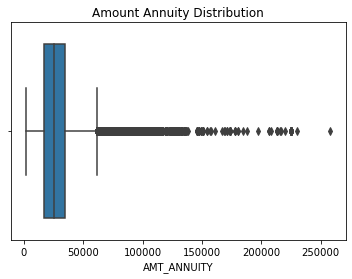

In [430]:
sns.boxplot(data.AMT_ANNUITY)
plt.title('Amount Annuity Distribution')
plt.show()

Here, we can see that there is an outlier at 258025, we can use median here to impute the outlier values

###### 6.2) AMT_INCOME

In [431]:
data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

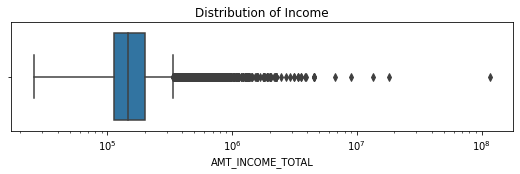

In [432]:
plt.figure(figsize=(9,2))
sns.boxplot(data.AMT_INCOME_TOTAL)
plt.xscale('log')
plt.title('Distribution of Income')
plt.show()

In [433]:
data.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In 'AMT_INCOME_TOTAL' variable, the outlier values at 1.17x10^8. If 95th and 99th quantile differ largely, then there are outliers in the data set.
We will cap the outliers here

###### 6.3) AMT_CREDIT

In [434]:
data.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

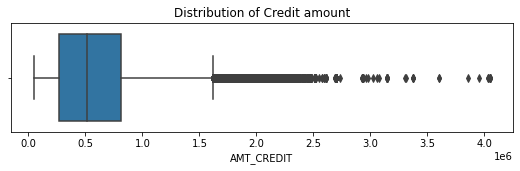

In [435]:
plt.figure(figsize=(9,2))
sns.boxplot(data.AMT_CREDIT)
plt.title('Distribution of Credit amount')
plt.show()

In [436]:
data.AMT_CREDIT.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

The outlier lie after the 99th quantile.

###### 6.4) DAYS_BIRTH

In [437]:
data.DAYS_BIRTH.describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

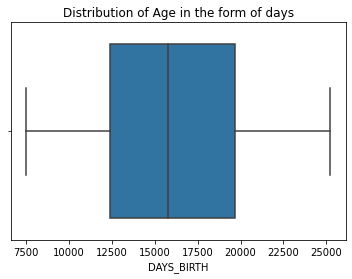

In [438]:
sns.boxplot(data.DAYS_BIRTH)
plt.title('Distribution of Age in the form of days')
plt.show()

Here, we can see that there are no outliers.

###### 6.5) DAYS_EMPLOYED

In [439]:
data.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

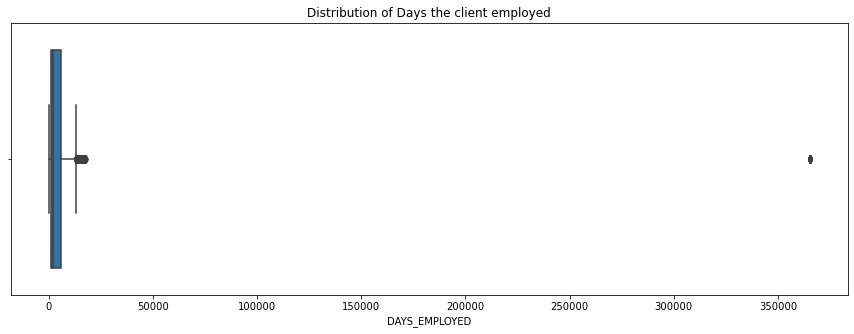

In [440]:
plt.figure(figsize=(15,5))
sns.boxplot(data.DAYS_EMPLOYED)
#plt.yscale('log')
plt.title('Distribution of Days the client employed')

plt.show()

Here, we have an outlier at 365243

### 7) Binning Continuous Variables

In [442]:
# Credit Amount

bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']

data['AMT_CREDIT_RANGE']=pd.cut(data['AMT_CREDIT'],bins=bins,labels=slots)

In [443]:
# Income amount

bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']

data['AMT_INCOME_RANGE']=pd.cut(data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [444]:
# Days birth

data['DAYS_BIRTH']= (data['DAYS_BIRTH']/365).astype(int)
data['DAYS_BIRTH_BINS']=pd.cut(data['DAYS_BIRTH'], bins=[19,25,35,60,100], labels=['Teen','Adult', 'Middle Age', 'Senior Citizen'])

In [445]:
# Checking the data
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,DAYS_BIRTH_BINS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium,Teen
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,Middle Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,Middle Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,Middle Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low,Middle Age


### 8) Analysis

###### Imbalance percentage

In [446]:
# Calculating Imbalance percentage
100*(data.TARGET.value_counts())/ (len(data))

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

Here, it is evident that the "TARGET" variable has 8.07% of 1's and around 91.92% of 0's.
Hence, we can say that 8% of customers have trouble in making payments and 92% are good to go!

In [449]:
# 2 datasets of target=1(client with payment difficulties) and target=0(all other)
target1 = data[data['TARGET']==1]
target0 = data[data['TARGET']==0]

In [450]:
# Checking target 0 dataframe
target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,DAYS_BIRTH_BINS
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,High,Medium,Middle Age
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,Middle Age
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,Middle Age
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low,Middle Age
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46,1588,4970.0,477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,Medium,Low,Middle Age


In [451]:
# Checking target 1 datafreame
target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,DAYS_BIRTH_BINS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Medium,Medium,Teen
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51,2628,6573.0,1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,High,Low,Middle Age
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47,1262,1182.0,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,High,Medium,Middle Age
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36,3597,45.0,4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,Low,Low,Middle Age
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,67,365243,5391.0,4199,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low,Senior Citizen


#### 8.1) Univariate Analysis on Numeric variables

###### Credit Amount

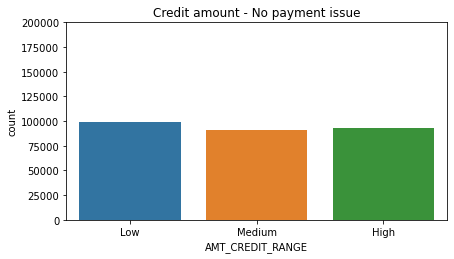

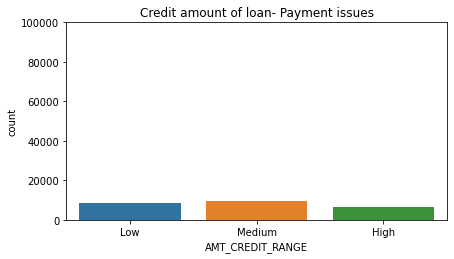

In [467]:
# For non-payment difficulties
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,200000)
plt.title('Credit amount - No payment issue')
sns.countplot(target0['AMT_CREDIT_RANGE'])
# subplot 2
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan- Payment issues')
plt.ylim(0,100000)
sns.countplot(target1['AMT_CREDIT_RANGE'])
plt.show()

##### Customers with low credit amount, are more likely to repay the loan!

##### Income

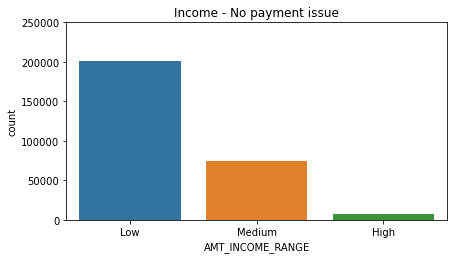

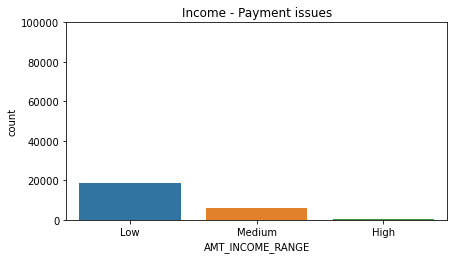

In [484]:
# For non-payment issues
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,250000)
plt.title('Income - No payment issue')
sns.countplot(target0['AMT_INCOME_RANGE'])
# For payment issues
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 2)
plt.title('Income - Payment issues')
plt.ylim(0,100000)
sns.countplot(target1['AMT_INCOME_RANGE'])
plt.show()

##### It is evident that people with low income levels are more likely to repay the loan as compared to other classes.

#### 8.2) Univariate Analysis on Categorical variables

###### Family Status

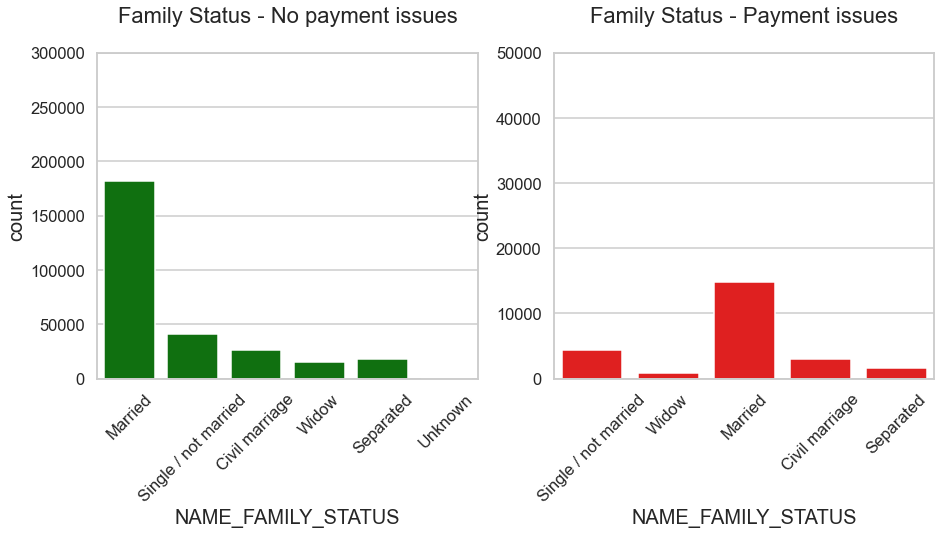

In [537]:
# For no payment issues

plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)


sns.countplot(target0['NAME_FAMILY_STATUS'],color="green")
plt.title('Family Status - No payment issues')
plt.ylim(0,300000)
plt.xticks(rotation = 45)

# For payment issues
plt.subplot(1, 2, 2)

sns.countplot(target1['NAME_FAMILY_STATUS'],color="red")
plt.title('Family Status - Payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 45)
plt.show()

##### Here, married people are most likely to repay the loan, while widows are least likely to repay.

##### Education Type

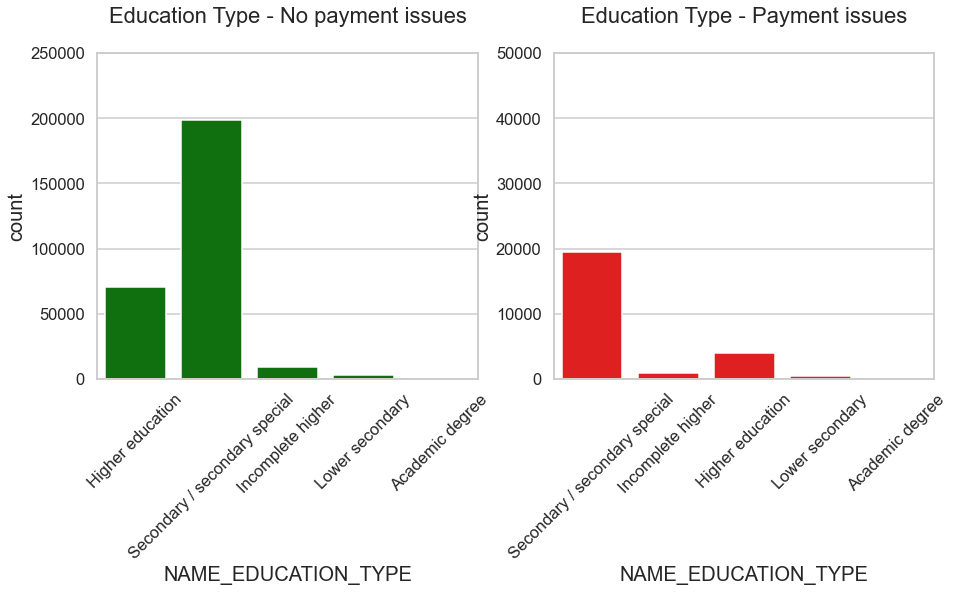

In [538]:
# For no payment issues

plt.figure(figsize = (15,6))
plt.subplot(1, 2, 1)


sns.countplot(target0['NAME_EDUCATION_TYPE'],color="green")
plt.title('Education Type - No payment issues')
plt.ylim(0,250000)
plt.xticks(rotation = 45)

# For payment issues
plt.subplot(1, 2, 2)

sns.countplot(target1['NAME_EDUCATION_TYPE'],color="red")
plt.title('Education Type - Payment issues')
plt.ylim(0,50000)
plt.xticks(rotation = 45)
plt.show()

###### Here, we can see that people with Secondary or Secondary special education status are highly likely to repay the loan, whereas people with just an academic degree are the least likely to repay the loan.

#### 8.3) Univariate Analysis on Continuous variables

##### Annuity Amount

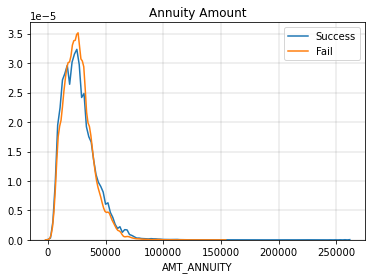

In [481]:
sns.distplot(target0['AMT_ANNUITY'], hist = False, label="Success")
sns.distplot(target1['AMT_ANNUITY'], hist = False, label="Fail")
plt.title('Annuity Amount')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

##### Credit Amount

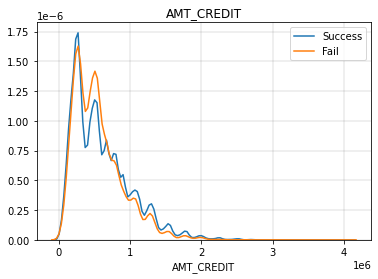

In [482]:
sns.distplot(target0['AMT_CREDIT'], hist = False, label="Success")
sns.distplot(target1['AMT_CREDIT'], hist = False, label="Fail")
plt.title('AMT_CREDIT')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

### 9) Correlation Matrix

In [487]:
#correlation matrix for all numerical columns
cor=target0.corr()
cor

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,1.317916e-03,0.001744,0.001475,0.000077,0.002925,-0.001717,-0.000854,0.003319,0.001408,0.000229,-0.002790,-0.000519,-0.000739,-0.000115,0.001589,0.000309,-0.000695,0.000556,-0.000741,0.002382,-0.000998,0.001342,-0.003217,-0.004321,-0.001426,0.001972,-0.003047,0.001618,0.002007,-8.524942e-04,-0.001900,-0.001092,0.001006,-0.001236,0.002330,-0.000753,0.001776,0.001194,0.000676,0.000832,-0.000485,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,-3.369071e-01,-0.245174,-0.185792,0.028751,0.001080,0.244274,0.055453,-0.001201,-0.029929,0.023460,0.878571,0.022842,0.021866,-0.005244,-0.015455,-0.041729,0.014471,-0.002246,0.014137,-0.002172,-0.008501,0.003736,0.055718,-0.003833,-0.016239,-0.158963,-0.001442,0.053919,-0.002358,-2.858658e-03,-0.005059,0.000322,0.004340,-0.005455,0.003710,0.011775,0.001160,0.004181,0.001078,0.001302,-0.002983,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,-6.249355e-02,-0.140392,-0.064937,-0.022896,0.000733,0.140744,-0.032404,-0.018814,0.002683,0.083705,0.034256,-0.186573,-0.200466,0.076743,0.139598,-0.072401,-0.027828,-0.027621,-0.027690,-0.027593,-0.041338,-0.002857,-0.039251,0.001160,0.004161,-0.100271,0.009035,0.159350,0.040088,6.367631e-04,0.005402,0.005680,0.049421,0.045590,0.023814,0.015800,0.005141,0.008214,0.005762,0.000840,-0.000869,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,4.736610e-02,-0.070104,-0.013477,0.001464,0.001498,0.071257,-0.017119,0.023096,0.026725,0.017074,0.064536,-0.103337,-0.112238,0.053619,0.129140,0.036085,-0.000914,-0.019851,-0.000892,-0.022225,-0.069540,0.005490,0.100334,0.000567,-0.011750,-0.050260,-0.003613,0.084524,0.022297,-3.243112e-03,0.028341,0.003956,0.053726,0.047987,0.032411,0.062477,0.012188,0.035527,0.021560,0.032151,-0.015602,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,-1.225350e-02,-0.104978,-0.039436,-0.014113,0.000161,0.105645,-0.022467,0.021397,0.012231,0.071270,0.075787,-0.132128,-0.145153,0.053589,0.126615,0.028051,-0.013091,-0.022535,-0.012893,-0.023385,-0.062013,0.001265,0.103447,0.001108,-0.006122,-0.074962,-0.001508,0.131483,0.033962,-3.492896e-03,-0.004040,0.000864,0.026064,0.037219,0.016277,0.007733,0.003527,-0.008344,0.004964,0.012736,-0.016527,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,-0.000205,NaN,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,4.455227e-02,-0.068609,-0.015916,0.003649

Getting rid of repeating correlation values -

In [490]:
cor=cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
cor

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,NaN,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001318,0.001744,0.001475,0.000077,0.002925,-0.001717,-0.000854,0.003319,0.001408,0.000229,-0.002790,-0.000519,-0.000739,-0.000115,0.001589,0.000309,-0.000695,0.000556,-0.000741,0.002382,-0.000998,0.001342,-0.003217,-0.004321,-0.001426,0.001972,-0.003047,0.001618,0.002007,-8.524942e-04,-0.001900,-0.001092,0.001006,-0.001236,0.002330,-0.000753,0.001776,0.001194,0.000676,0.000832,-0.000485,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,NaN,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336907,-0.245174,-0.185792,0.028751,0.001080,0.244274,0.055453,-0.001201,-0.029929,0.023460,0.878571,0.022842,0.021866,-0.005244,-0.015455,-0.041729,0.014471,-0.002246,0.014137,-0.002172,-0.008501,0.003736,0.055718,-0.003833,-0.016239,-0.158963,-0.001442,0.053919,-0.002358,-2.858658e-03,-0.005059,0.000322,0.004340,-0.005455,0.003710,0.011775,0.001160,0.004181,0.001078,0.001302,-0.002983,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,0.342799,0.418953,0.349462,0.167851,-0.062494,-0.140392,-0.064937,-0.022896,0.000733,0.140744,-0.032404,-0.018814,0.002683,0.083705,0.034256,-0.186573,-0.200466,0.076743,0.139598,-0.072401,-0.027828,-0.027621,-0.027690,-0.027593,-0.041338,-0.002857,-0.039251,0.001160,0.004161,-0.100271,0.009035,0.159350,0.040088,6.367631e-04,0.005402,0.005680,0.049421,0.045590,0.023814,0.015800,0.005141,0.008214,0.005762,0.000840,-0.000869,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,0.771309,0.987250,0.100604,0.047366,-0.070104,-0.013477,0.001464,0.001498,0.071257,-0.017119,0.023096,0.026725,0.017074,0.064536,-0.103337,-0.112238,0.053619,0.129140,0.036085,-0.000914,-0.019851,-0.000892,-0.022225,-0.069540,0.005490,0.100334,0.000567,-0.011750,-0.050260,-0.003613,0.084524,0.022297,-3.243112e-03,0.028341,0.003956,0.053726,0.047987,0.032411,0.062477,0.012188,0.035527,0.021560,0.032151,-0.015602,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,NaN,NaN,NaN,NaN,NaN,NaN,0.776686,0.120988,-0.012254,-0.104978,-0.039436,-0.014113,0.000161,0.105645,-0.022467,0.021397,0.012231,0.071270,0.075787,-0.132128,-0.145153,0.053589,0.126615,0.028051,-0.013091,-0.022535,-0.012893,-0.023385,-0.062013,0.001265,0.103447,0.001108,-0.006122,-0.074962,-0.001508,0.131483,0.033962,-3.492896e-03,-0.004040,0.000864,0.026064,0.037219,0.016277,0.007733,0.003527,-0.008344,0.004964,0.012736,-0.016527,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.103827,0.044552,-0.068609,-0.015916,0.003649,0.001464,0.069769,0.005043,0.020185,0.042255,0.017249,0.062814,-0.104382,-0.112601,0.062766,0.135694,0.038908,-0.000707,-0.021025,-0

In [491]:
# Dataframe
cordf = cor.unstack().reset_index()
cordf.head()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [492]:
# Setting column names
cordf.columns=['VAR1','VAR2','Correlation']
cordf.head()

,VAR1,VAR2,Correlation
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [493]:
#Dropping the columns with missing values
cordf.dropna(subset = ['Correlation'], inplace = True)
cordf.head()

,VAR1,VAR2,Correlation
110,CNT_CHILDREN,SK_ID_CURR,-0.000716
165,AMT_INCOME_TOTAL,SK_ID_CURR,0.001739
167,AMT_INCOME_TOTAL,CNT_CHILDREN,0.027397
220,AMT_CREDIT,SK_ID_CURR,-0.000342
222,AMT_CREDIT,CNT_CHILDREN,0.003081


In [494]:
#Rounding off the values
cordf['Correlation'] = round(cordf['Correlation'], 2)
cordf.head()

,VAR1,VAR2,Correlation
110,CNT_CHILDREN,SK_ID_CURR,-0.00
165,AMT_INCOME_TOTAL,SK_ID_CURR,0.00
167,AMT_INCOME_TOTAL,CNT_CHILDREN,0.03
220,AMT_CREDIT,SK_ID_CURR,-0.00
222,AMT_CREDIT,CNT_CHILDREN,0.00


In [495]:
# Converting it into absolute value
cordf['Correlation'] = cordf['Correlation'].abs()
cordf.head()

,VAR1,VAR2,Correlation
110,CNT_CHILDREN,SK_ID_CURR,0.00
165,AMT_INCOME_TOTAL,SK_ID_CURR,0.00
167,AMT_INCOME_TOTAL,CNT_CHILDREN,0.03
220,AMT_CREDIT,SK_ID_CURR,0.00
222,AMT_CREDIT,CNT_CHILDREN,0.00


In [497]:
#Sorting the correlation values
cordf.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
1454,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
724,FLAG_EMP_PHONE,DAYS_EMPLOYED,1.00
334,AMT_GOODS_PRICE,AMT_CREDIT,0.99
1119,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
992,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
1510,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
335,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
279,AMT_ANNUITY,AMT_CREDIT,0.77
503,DAYS_EMPLOYED,DAYS_BIRTH,0.63
723,FLAG_EMP_PHONE,DAYS_BIRTH,0.62


###### It is evident from the table that Social circle for 30 days and 60 days are the most correlated and customers providing phone numbers and age are the least correlated. 

In [499]:
#For target1 dataframe
cor = target1.corr()

cor = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
cordf = cor.unstack().reset_index()
cordf.columns = ['VAR1', 'VAR2', 'Correlation']
cordf.dropna(subset = ['Correlation'], inplace = True)
cordf['Correlation'] = round(cordf['Correlation'], 2)
cordf.sort_values(by = 'Correlation', ascending = False).head(10)


,VAR1,VAR2,Correlation
1454,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
334,AMT_GOODS_PRICE,AMT_CREDIT,0.98
1119,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
992,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
1510,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
335,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
279,AMT_ANNUITY,AMT_CREDIT,0.75
1824,FLAG_DOCUMENT_6,DAYS_EMPLOYED,0.62
503,DAYS_EMPLOYED,DAYS_BIRTH,0.58
1823,FLAG_DOCUMENT_6,DAYS_BIRTH,0.39


###### Here, It is evident from the table that Social circle for 30 days and 60 days are the most correlated and flag for document 6 and age are the least correlated. 

### 10) Bivariate Analysis

#### 10.1) Numeric - Numeric

##### Income vs Good Price

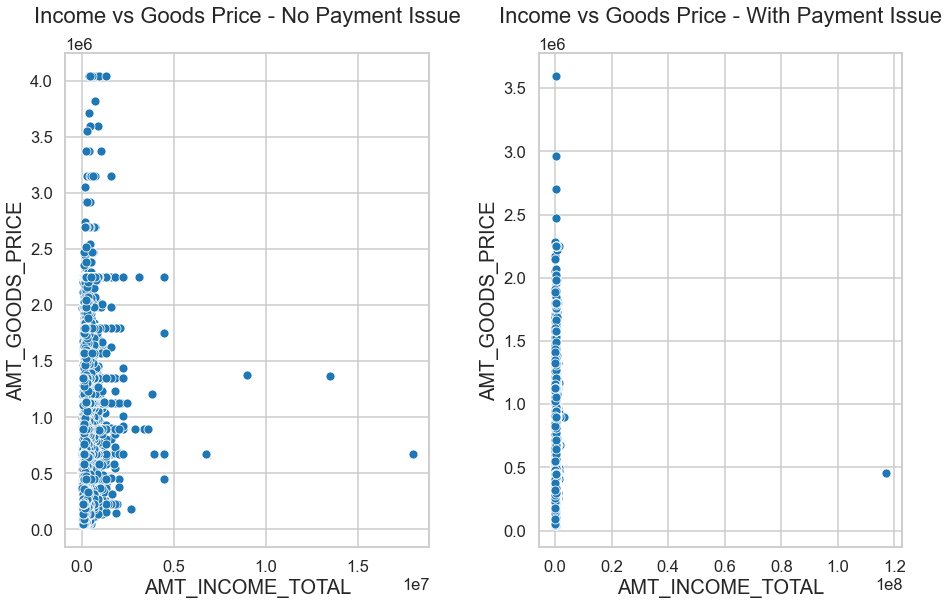

In [541]:
plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(target0.AMT_INCOME_TOTAL,target0.AMT_GOODS_PRICE)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_GOODS_PRICE')
plt.title('Income vs Goods Price - No Payment Issue')

plt.subplot(2,2,2)
sns.scatterplot(target1.AMT_INCOME_TOTAL,target1.AMT_GOODS_PRICE)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_GOODS_PRICE')
plt.title('Income vs Goods Price - With Payment Issue')
plt.show()

##### Goods Price vs Credit

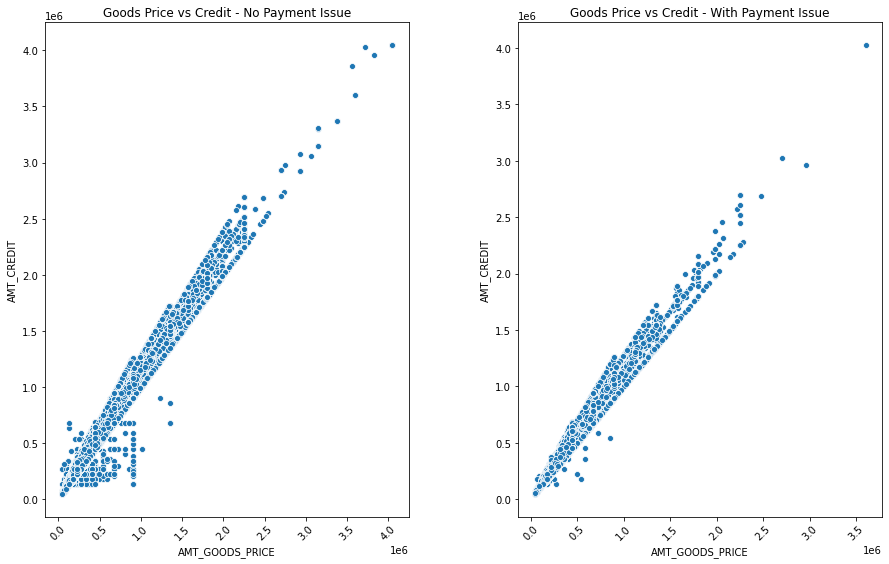

In [510]:
plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)

plt.subplot(2,2,3)
sns.scatterplot(target0.AMT_GOODS_PRICE,target0.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('Goods Price vs Credit - No Payment Issue')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(target1.AMT_GOODS_PRICE,target1.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('Goods Price vs Credit - With Payment Issue')
plt.xticks(rotation = 45)
plt.show()

###### People who repay the loan on time have a chance of getting a loan for more expensive goods. Also, people who repay loan on time, have a higher chance of getting credit for a particular goods value.

#### 10.2) Numeric - Categotical

##### Income Range - Education Status

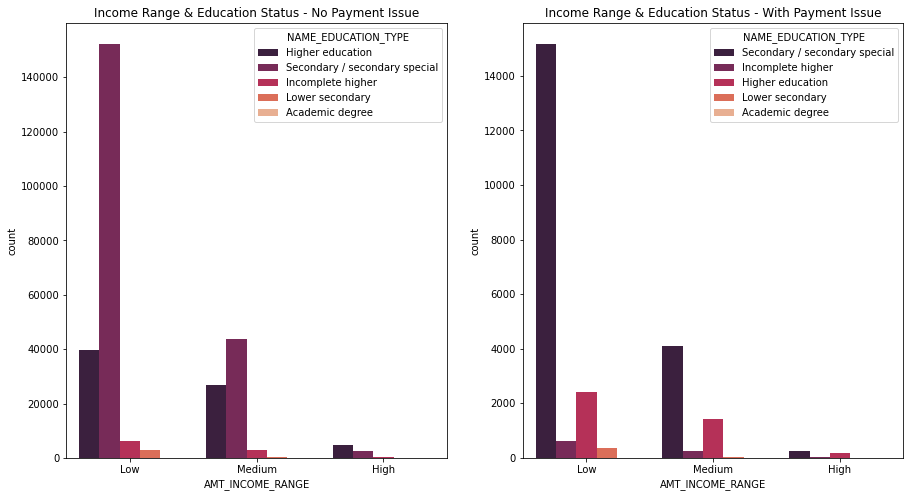

In [514]:
plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
plt.title('Income Range & Education Status - No Payment Issue')

sns.countplot(x='AMT_INCOME_RANGE', hue='NAME_EDUCATION_TYPE', data=target0, palette='rocket')

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Income Range & Education Status - With Payment Issue')

sns.countplot(x='AMT_INCOME_RANGE', hue='NAME_EDUCATION_TYPE', data=target1,palette='rocket')
plt.show()

###### We can see here, that people with secondary/secondary special education status and a low income range are most likely to repay the loan!

##### Credit Amount - Marital Status

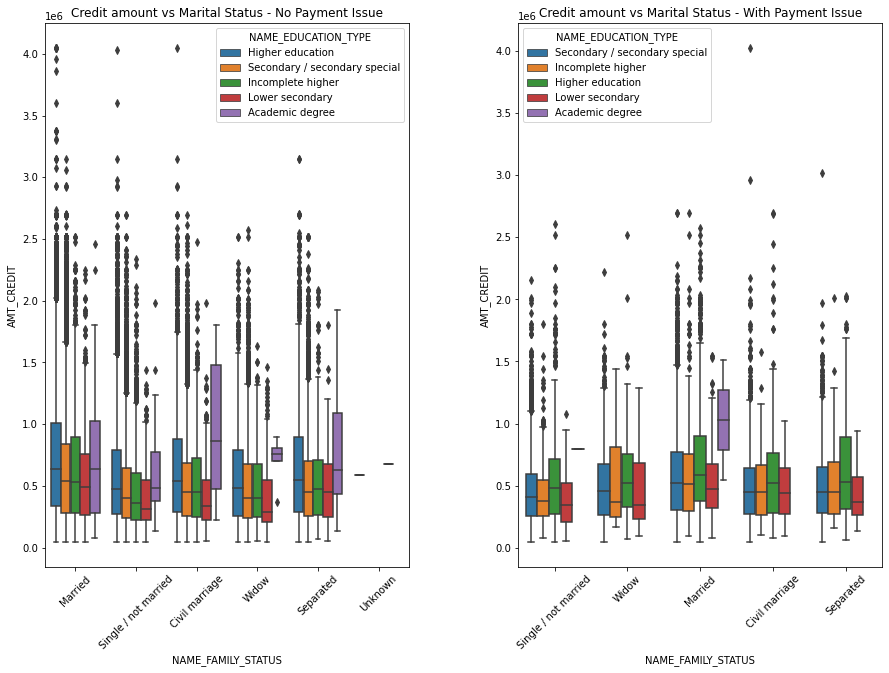

In [520]:
# Box plotting for Credit amount

plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.boxplot(data =target0, x='NAME_FAMILY_STATUS',y='AMT_CREDIT', hue ='NAME_EDUCATION_TYPE',orient='v]')
plt.title('Credit amount vs Marital Status - No Payment Issue')
plt.xticks(rotation=45)

plt.subplot(122)
sns.boxplot(data =target1, x='NAME_FAMILY_STATUS',y='AMT_CREDIT', hue ='NAME_EDUCATION_TYPE',orient='v]')
plt.title('Credit amount vs Marital Status - With Payment Issue')
plt.xticks(rotation=45)
plt.show()


###### We can see from this graph, that married people with a higher education status are likely to get much higher credit as compared to a widow with a lower education status.

### 11) Reading Previous Application

In [521]:
data1=pd.read_csv("previous_application.csv")
data1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [522]:
# Dropping 'XNA' and 'XAP'

data1=data1.drop(data1[data1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
data1=data1.drop(data1[data1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
data1=data1.drop(data1[data1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [523]:
#Merge the previous application with the current application data file
merged_data= pd.merge(data, data1, how='inner', on='SK_ID_CURR',suffixes='_x')
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,DAYS_BIRTH_BINS,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,28,1010,4799.0,3015,1,1,0,1,0,0,Laborers,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,NaN,0.0,0.0,0.0,0.0,-599.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,Adult,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,41,2668,5266.0,3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,Medium,Middle Age,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,32,2060,3557.0,3557,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,0.411849,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,High,Medium,Adult,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,MONDAY,14,Y,1,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365

In [524]:
# Renaming the column names after merging

ndata = merged_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
ndata.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,DAYS_BIRTH_BINS,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,28,1010,4799.0,3015,1,1,0,1,0,0,Laborers,1.0,2,2,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,NaN,0.0,0.0,0.0,0.0,-599.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,Adult,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,41,2668,5266.0,3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,Medium,Middle Age,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,32,2060,3557.0,3557,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,0.411849,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,High,Medium,Adult,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,MONDAY,14,Y,1,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash 

In [525]:
# Dropping unwanted columns

ndata.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)
ndata.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,DAYS_BIRTH_BINS,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,28,1010,4799.0,3015,1,1,0,1,0,0,Laborers,1.0,2,2,Business Entity Type 3,0.502779,NaN,0.0,0.0,0.0,0.0,-599.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,Adult,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,41,2668,5266.0,3787,1,1,0,1,0,1,NaN,2.0,2,2,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,Medium,Middle Age,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,32,2060,3557.0,3557,1,1,0,1,0,0,Drivers,3.0,2,2,Self-employed,0.321745,0.411849,2.0,0.0,2.0,0.0,-697.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,High,Medium,Adult,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,44,1761,8236.0,4292,1,1,0,1,0,0,Managers,2.0,2,2,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,-540.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,Middle Age,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,NaN,NaN,NaN,Repa

#### 11.1) Univariate Analysis

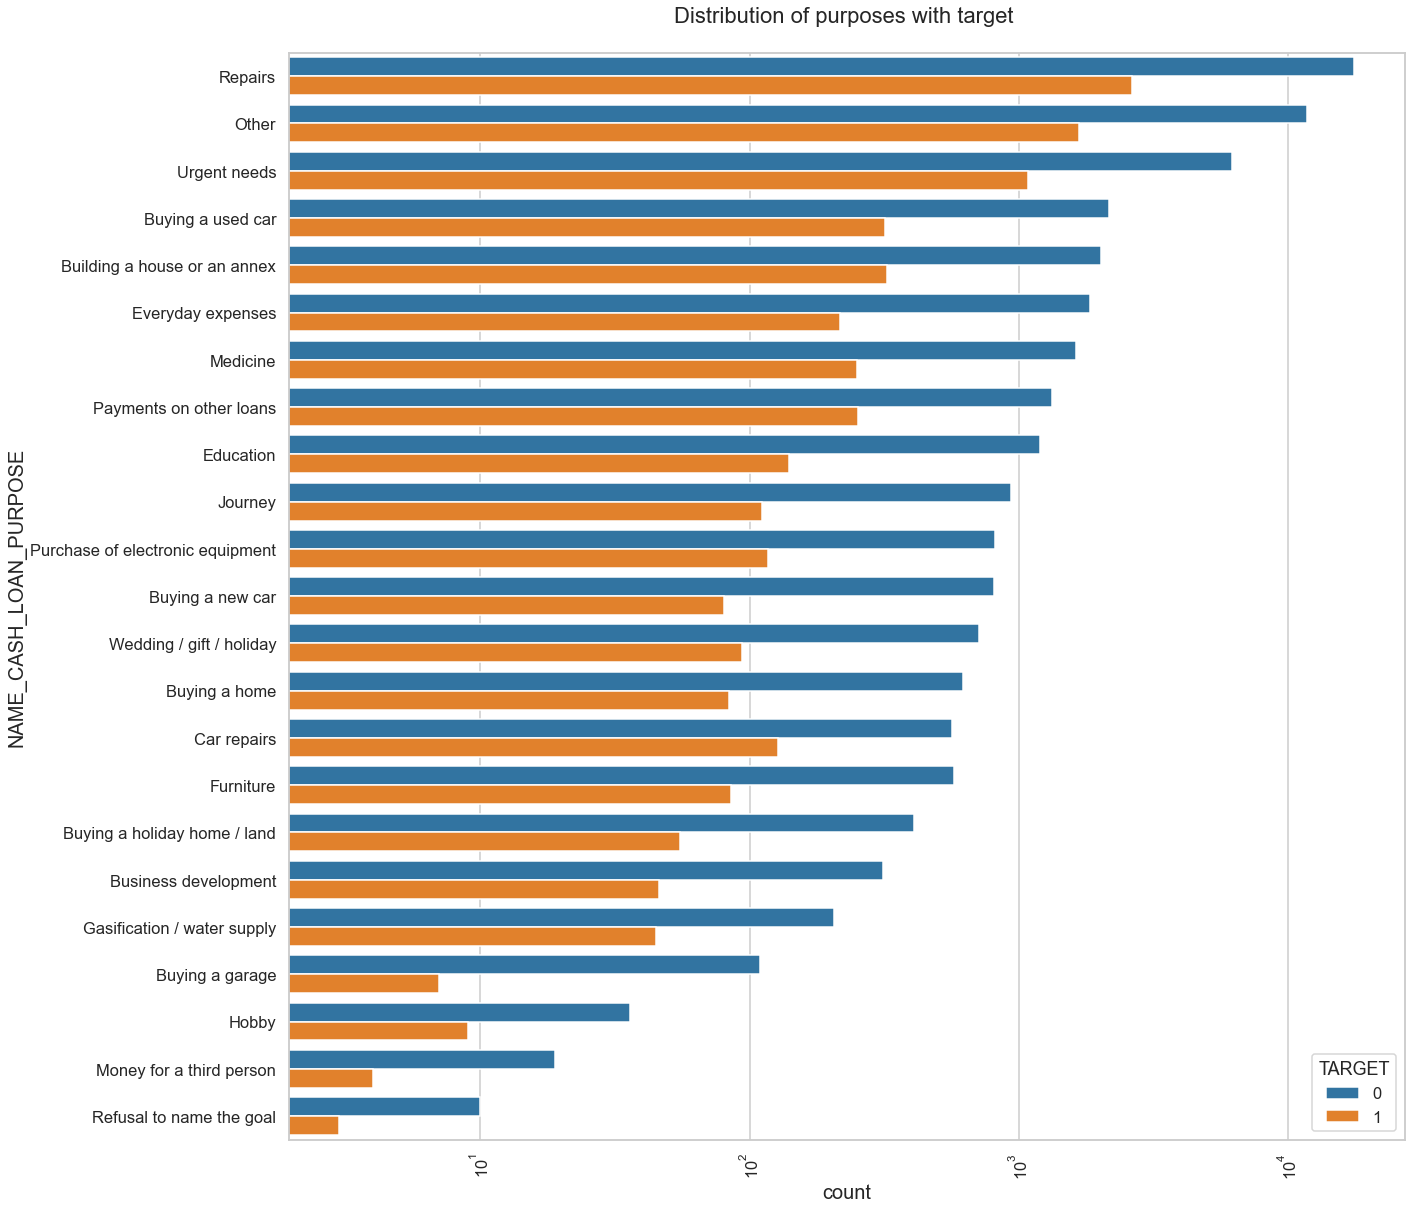

In [526]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = ndata, y= 'NAME_CASH_LOAN_PURPOSE', order=ndata['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

###### Here, we can see that cases like "buying a garage", "Buying a new car", "Money for a third person" have very high chances of successful loan repayment. Hence cases like these should be focussed on.

##### 11.2) Bivariate Analysis

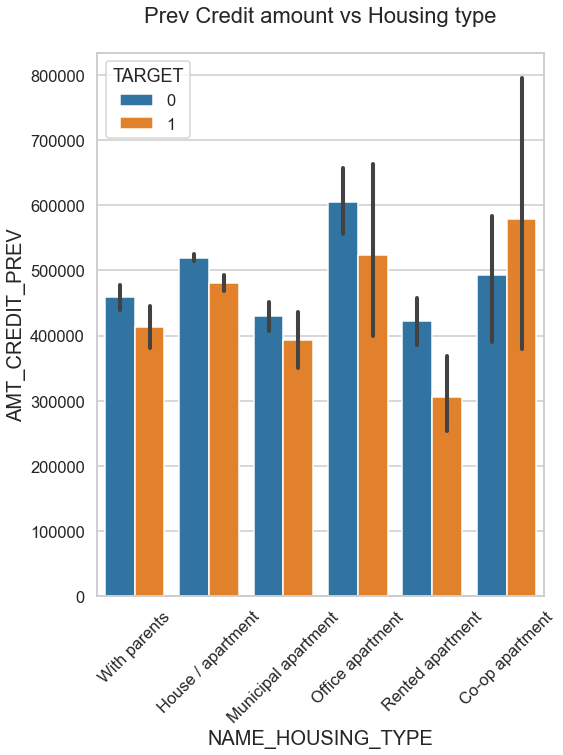

In [531]:

# Box plotting for Credit amount prev vs Housing type

plt.figure(figsize=(8,10))
plt.xticks(rotation=45)
sns.barplot(data =ndata, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE',)
plt.title('Prev Credit amount vs Housing type')
plt.show()

###### Here, we can see that "Office Apartment" category is having higher credit when it comes to ease of payment. Hence they should be focussed more, also banks should stay away from "Co-op apartment" category.

### General Conclusions - 
1. Highly educated married people are generally make successful payments.
2. Banks should be careful in case of widows as well as very high income class
3. People who take loans for a new car or a new garage are a promising investment for banks